In [1]:
import nbsetup
import scipy as sp
import ensemblepy as ep
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [197]:
def swarm(collection, title):
    plt.tight_layout()
    nbsetup.cp("analysing")
    data = []
    for adjustment, experiments in collection.items():
        for ei, row in enumerate(experiments[0].observations):
            for v in row:
                data.append({
                    'ensemble': str(ei),
                    'adjustment': str(adjustment),
                    'value': v})
    
    first_trial = pd.DataFrame(data)
    
    
    data = []
    for adjustment, experiments in collection.items():
        for i, ens in enumerate(experiments):
            d = {'adjustment': str(adjustment), 'trial': str(i)}
            d.update(ens.comparison())
            data.append(d)
    comp_df = pd.DataFrame(data)
    
    nbsetup.cp("plotting")
    f, ax = plt.subplots(8, 1, figsize=(10,12), gridspec_kw={'height_ratios':[4, 1, 1, 1, 1, 1, 1, 1]})
    # obs
    sns.stripplot(
        ax=ax[0],
        data=first_trial, y="value", x="adjustment", hue="ensemble",
        dodge=True, jitter=0.3,  alpha=1, zorder=1, s=2
    ).set(xticks=[], xlabel=None, ylabel='Example visualisation')
    ax[0].get_legend().remove()
    ax[0].set_title(title)
    
    settings = (('incoherence', (0,0.5)),
                ('std(means)', (0,0.5)),
                ('std(stds)', (0,0.5)),
                ('ANOVA', (0,None)),
                ('ANOVA p', (0,1)),
                ('Kruskal', (0,None)),
                ('Kruskal p', (0,1)))
    
    for ai, (y, lim) in enumerate(settings):
        sns.stripplot(
            ax=ax[ai+1],
            data=comp_df[comp_df['trial'] != '0'], y=y, x="adjustment",
            dodge=True, jitter=1, alpha=1, zorder=1, s=3, color='teal'
            ).set(xticks=[], ylim=lim, xlabel=None)
        
        g = sns.scatterplot(data=comp_df[comp_df['trial'] == '0'],
            y=y, x='adjustment', color='black', ax=ax[ai+1])
        
    g.set(xlabel="Adjustment", xticks=first_trial['adjustment'].unique())
    
    return f

plotting


<Figure size 432x288 with 0 Axes>

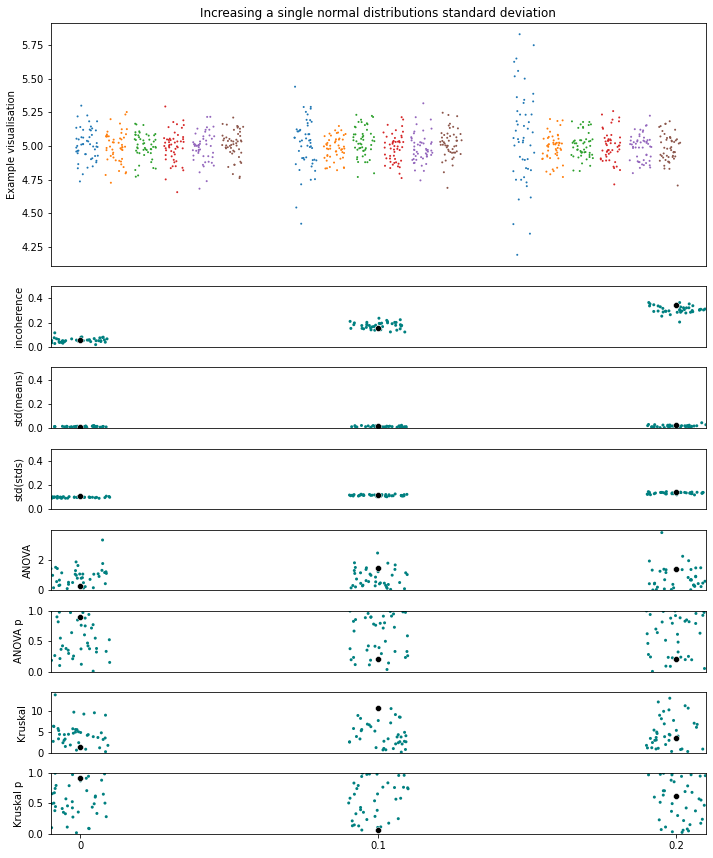

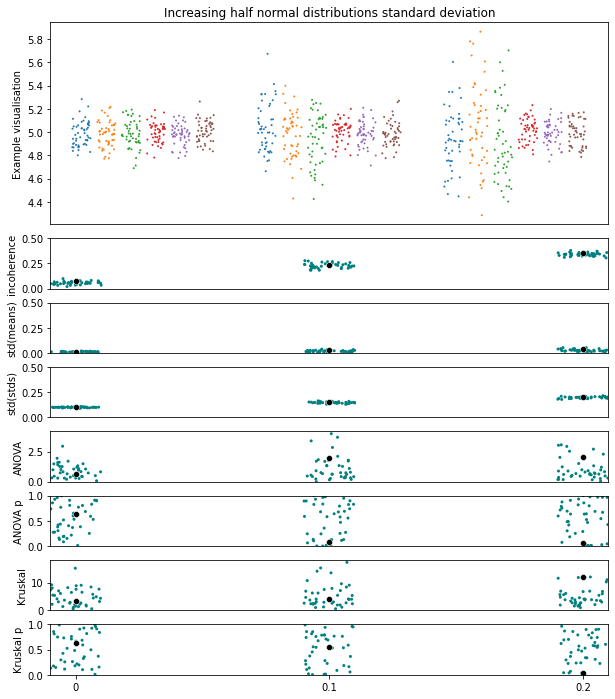

In [199]:
def increasing_std(title, cutoff, base=0.1, adjustments=(0, 0.1, 0.2), ensembles=6, points=50, trials=40):
    collection = {}
    for a in adjustments:
        nbsetup.cp(a)
        collection[a] = []
        for t in range(trials):
            obs = []
            for i in range(ensembles):
                if i < cutoff:
                    obs.append(np.random.normal(5, base+a, points))
                else:
                    obs.append(np.random.normal(5, base, points))
            collection[a].append(ep.Continuous(obs))
        
    return swarm(collection, title)

increasing_std("Increasing a single normal distributions standard deviation", 1).savefig('cont-1-std.eps')

plotting


<Figure size 432x288 with 0 Axes>

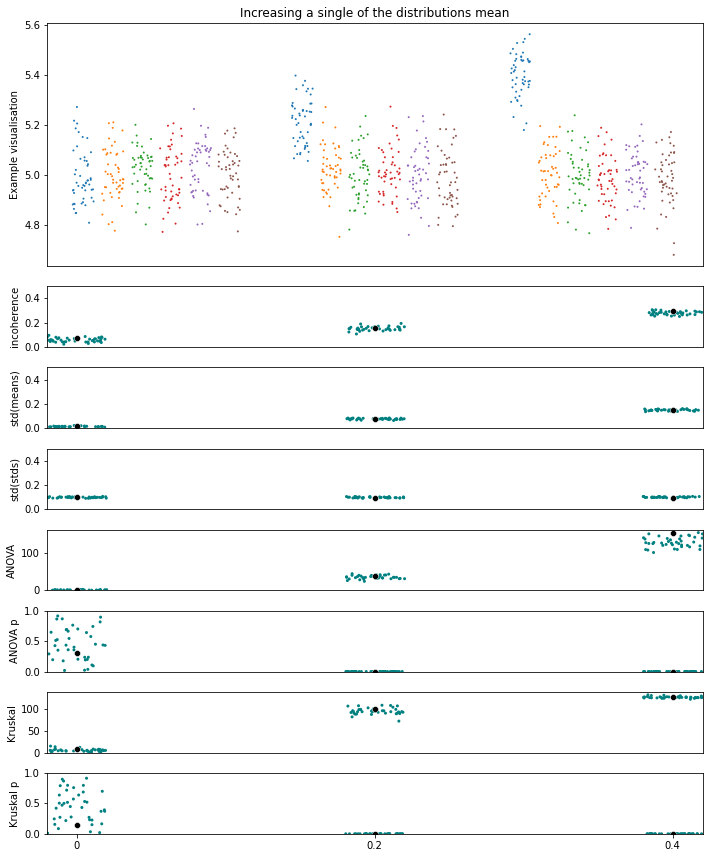

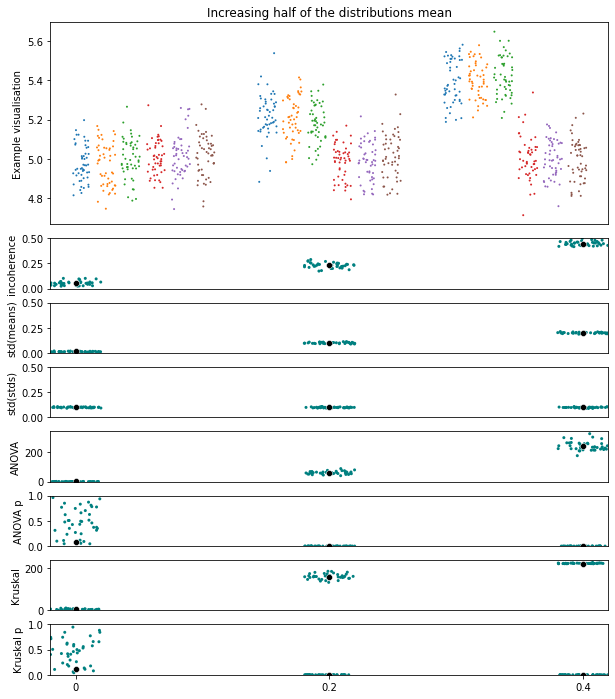

In [200]:
def increasing_means(title, cutoff, base=0.1, adjustments=(0, 0.2, 0.4), ensembles=6, points=50, trials=40):
    collection = {}
    for a in adjustments:
        nbsetup.cp(a)
        collection[a] = []
        for t in range(trials):
            obs = []
            for i in range(ensembles):
                if i < cutoff:
                    obs.append(np.random.normal(5+a, base, points))
                else:
                    obs.append(np.random.normal(5, base, points))
            collection[a].append(ep.Continuous(obs))
        
    return swarm(collection, title)

increasing_means("Increasing a single of the distributions mean", 1).savefig('cont-1-mean.eps')
increasing_means("Increasing half of the distributions mean", 3).savefig('cont-3-mean.eps')

plotting


<Figure size 432x288 with 0 Axes>

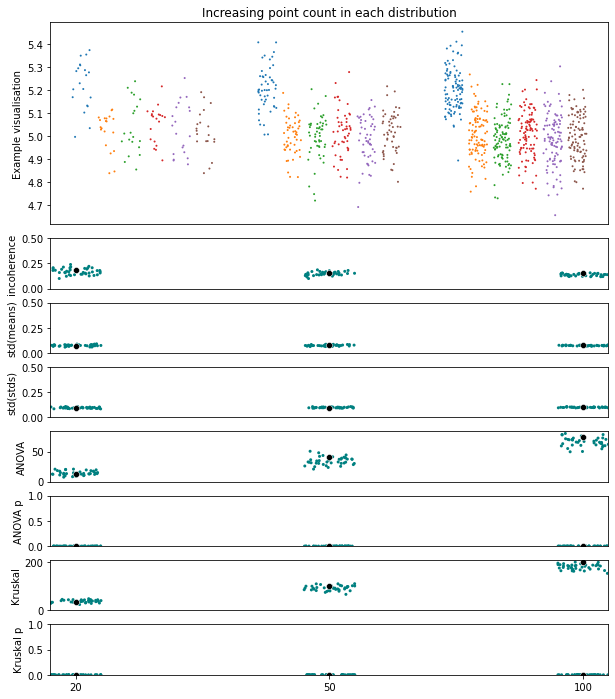

In [201]:
def increasing_points(title, base=0.1, adjustments=(20, 50, 100), ensembles=6, trials=40):
    collection = {}
    for a in adjustments:
        nbsetup.cp(a)
        collection[a] = []
        for t in range(trials):
            obs = []
            for i in range(ensembles):
                if i < 1:
                    obs.append(np.random.normal(5+0.2, base, a))
                else:
                    obs.append(np.random.normal(5, base, a))
            collection[a].append(ep.Continuous(obs))
        
    return swarm(collection, title)

increasing_points("Increasing point count in each distribution").savefig('cont-points.eps')

plotting


<Figure size 432x288 with 0 Axes>

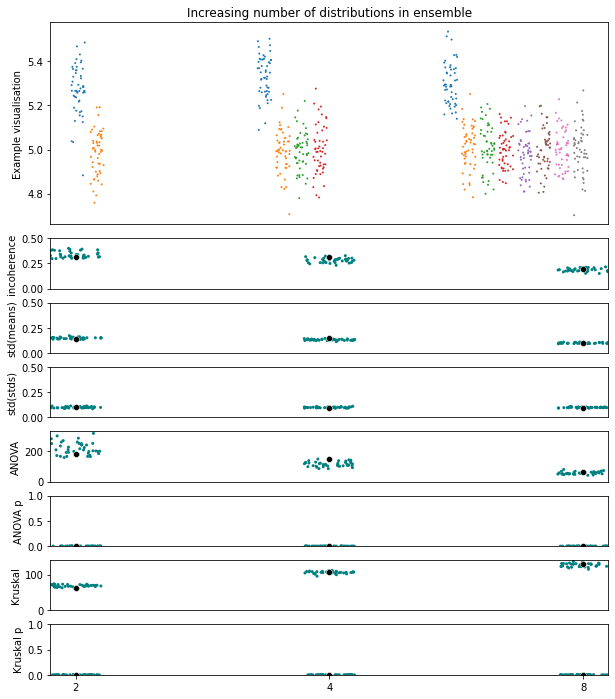

In [202]:
def increasing_ensembles(title, base=0.1, adjustments=(2, 4, 8), points=50, trials=40):
    collection = {}
    for a in adjustments:
        nbsetup.cp(a)
        collection[a] = []
        for t in range(trials):
            obs = []
            for i in range(a):
                if i < 1:
                    obs.append(np.random.normal(5+0.3, base, points))
                else:
                    obs.append(np.random.normal(5, base, points))
            collection[a].append(ep.Continuous(obs))
        
    return swarm(collection, title)

increasing_ensembles("Increasing number of distributions in ensemble").savefig('cont-ensembles.eps')